In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("tested.csv")

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


##basic info

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.shape

(418, 12)

##handling missing values

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
(df.isnull().sum() / df.shape[0]) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [11]:
df.drop(columns=['Cabin'],inplace=True)

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [13]:
df.shape

(418, 11)

In [14]:
# Calculate medians for 'Age' and 'Fare'
age_median = df['Age'].median()
fare_median = df['Fare'].median()
print(age_median)
print(fare_median)

27.0
14.4542


In [15]:
# Fill missing values in 'Age' and 'Fare' with their medians
df['Age'] = df['Age'].fillna(age_median)
df['Fare'] = df['Fare'].fillna(fare_median)

# Verify that missing values have been filled
print(df[['Age', 'Fare']].isnull().sum())

Age     0
Fare    0
dtype: int64


##Exploratory Data Analysis

In [16]:
df.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


In [17]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

PassengerId
1309    0.239234
892     0.239234
1293    0.239234
1292    0.239234
1291    0.239234
          ...   
898     0.239234
897     0.239234
896     0.239234
895     0.239234
894     0.239234
Name: count, Length: 418, dtype: float64
Survived
0    63.636364
1    36.363636
Name: count, dtype: float64
Pclass
3    52.153110
1    25.598086
2    22.248804
Name: count, dtype: float64
Name
Peter, Master. Michael J                        0.239234
Kelly, Mr. James                                0.239234
Gale, Mr. Harry                                 0.239234
Bonnell, Miss. Caroline                         0.239234
Conlon, Mr. Thomas Henry                        0.239234
                                                  ...   
Connolly, Miss. Kate                            0.239234
Svensson, Mr. Johan Cervin                      0.239234
Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0.239234
Wirz, Mr. Albert                                0.239234
Myles, Mr. Thomas Francis             

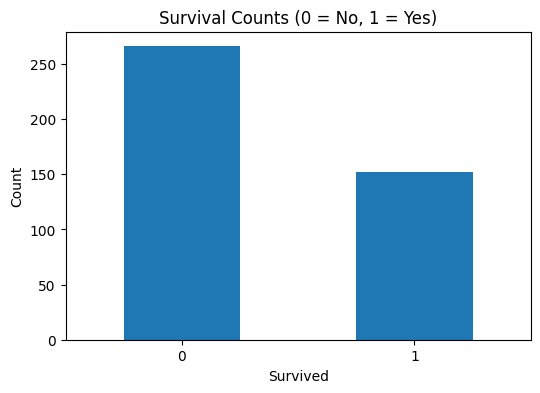

In [18]:
# Survival distribution
plt.figure(figsize=(6,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Counts (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

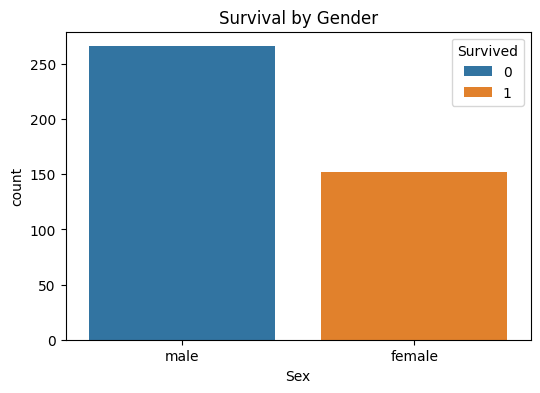

In [19]:
# Survival rate by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived' )
plt.title('Survival by Gender')
plt.show()

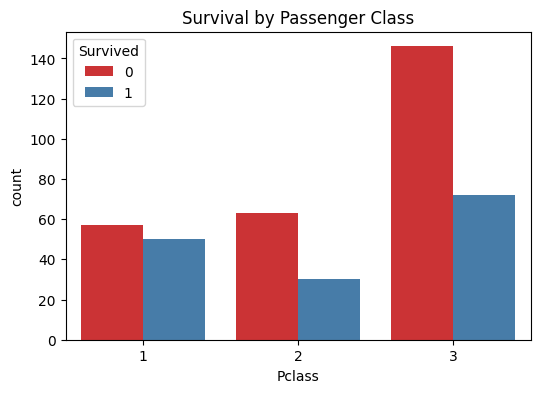

In [20]:
# Survival rate by passenger class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.show()

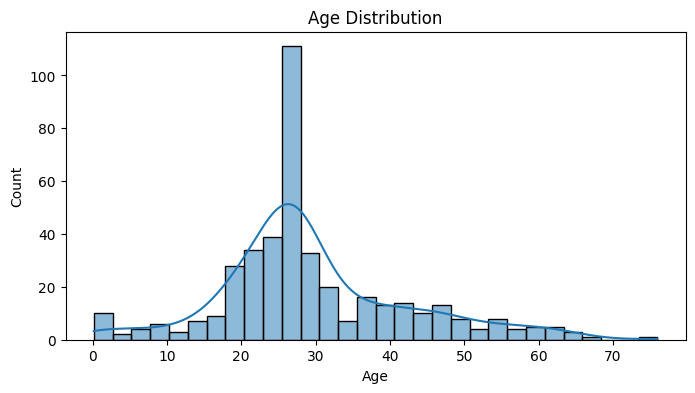

In [21]:

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

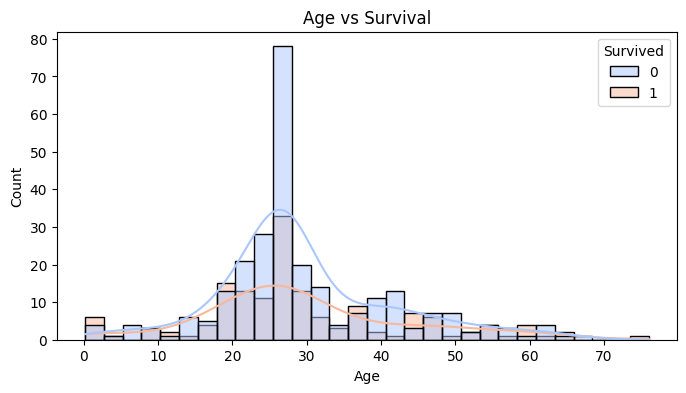

In [22]:
# Survival by Age
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='coolwarm')
plt.title('Age vs Survival')
plt.show()

<ipython-input-23-c2f6d9de3121>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3')


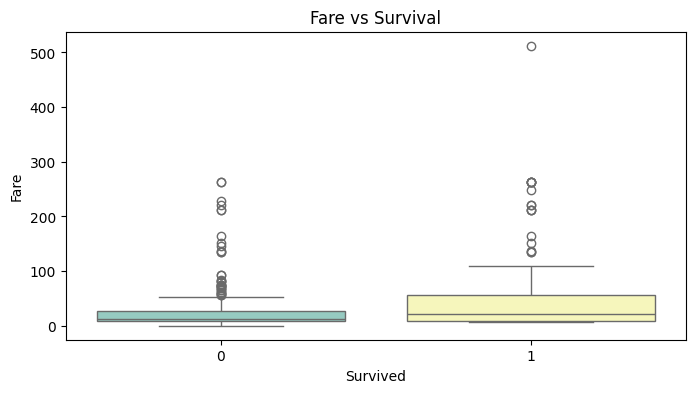

In [23]:
# Fare distribution
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3')
plt.title('Fare vs Survival')
plt.show()

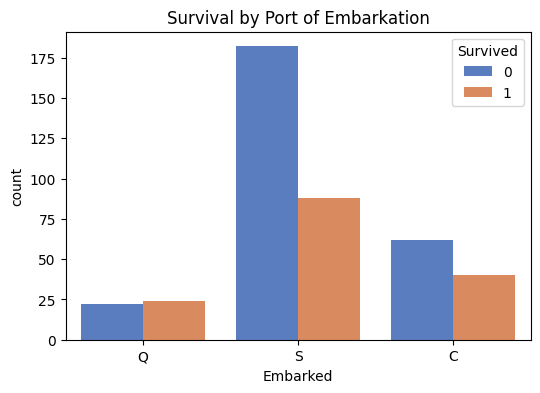

In [24]:
# Embarked analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='muted')
plt.title('Survival by Port of Embarkation')
plt.show()

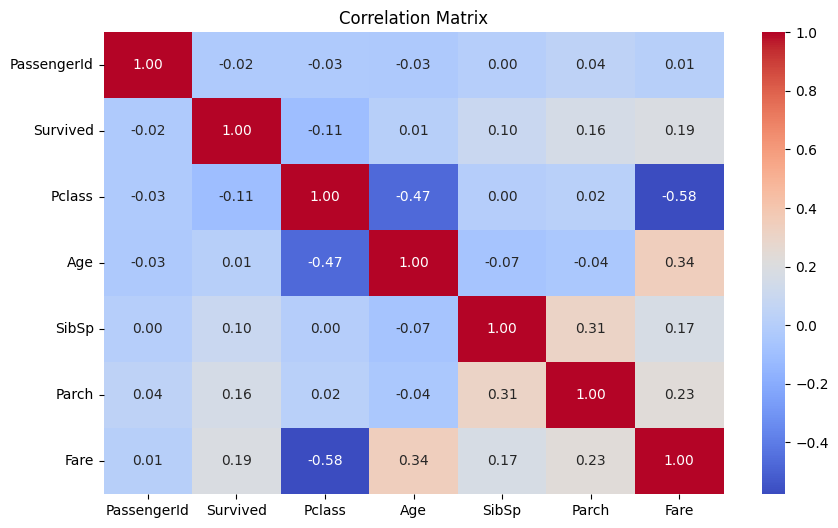

In [25]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Data preprocessing

##Feature Engineering

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [27]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
df['Title'] = df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
    'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create FamilySize = SibSp + Parch + 1 (including self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create Fare Bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

# Fill missing Age values with median (you can also use predictive imputation)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Create Age Bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young', 'Adult', 'Senior'])

# View changes
print(df[['Name', 'Title', 'FamilySize', 'Fare', 'FareBin', 'Age', 'AgeBin']].head())


                                           Name Title  FamilySize     Fare  \
0                              Kelly, Mr. James    Mr           1   7.8292   
1              Wilkes, Mrs. James (Ellen Needs)   Mrs           2   7.0000   
2                     Myles, Mr. Thomas Francis    Mr           1   9.6875   
3                              Wirz, Mr. Albert    Mr           1   8.6625   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs           3  12.2875   

  FareBin   Age  AgeBin  
0       1  34.5   Young  
1       1  47.0   Adult  
2       2  62.0  Senior  
3       2  27.0   Young  
4       2  22.0   Young  


<ipython-input-27-cb98094b512e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


##One-Hot Encoding

In [28]:
# Drop columns not useful for modeling
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# One-Hot Encode categorical columns
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Title', 'FareBin', 'AgeBin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Final check
print("Final dataframe shape:", df.shape)
print(df.head())


Final dataframe shape: (418, 22)
   Survived   Age  SibSp  Parch     Fare  FamilySize  Sex_male  Embarked_Q  \
0         0  34.5      0      0   7.8292           1      True        True   
1         1  47.0      1      0   7.0000           2     False       False   
2         0  62.0      0      0   9.6875           1      True        True   
3         0  27.0      0      0   8.6625           1      True       False   
4         1  22.0      1      1  12.2875           3     False       False   

   Embarked_S  Pclass_2  ...  Title_Mr  Title_Mrs  Title_Rare  FareBin_2  \
0       False     False  ...      True      False       False      False   
1        True     False  ...     False       True       False      False   
2       False      True  ...      True      False       False       True   
3        True     False  ...      True      False       False       True   
4        True     False  ...     False       True       False       True   

   FareBin_3  FareBin_4  AgeBin_Teen  Age

##Normalization

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols_to_scale = ['Fare', 'Age']

df_scaled = df.copy()

# StandardScaler
scaler_std = StandardScaler()
df_scaled[cols_to_scale] = scaler_std.fit_transform(df_scaled[cols_to_scale])

print(df_scaled[cols_to_scale].describe())


               Fare           Age
count  4.180000e+02  4.180000e+02
mean   8.711798e-17  5.524555e-17
std    1.001198e+00  1.001198e+00
min   -6.377637e-01 -2.319355e+00
25%   -4.962194e-01 -5.200968e-01
50%   -3.786501e-01 -2.048523e-01
75%   -7.358230e-02  4.847449e-01
max    8.546519e+00  3.656893e+00


# Model training and evaluation

🎯 Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


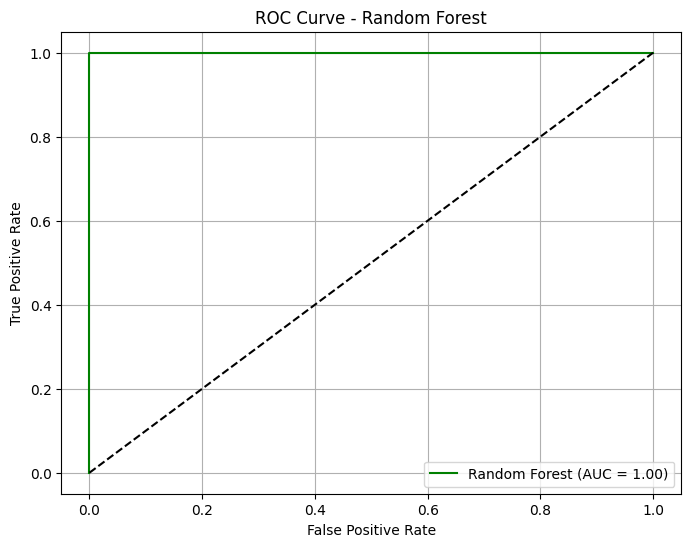

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Train-Test Split
X = df_scaled.drop('Survived', axis=1)
y = df_scaled['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

# Evaluation Metrics
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# ROC Curve
y_prob = rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_val, y_prob):.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


#model tunning

In [31]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val score:", grid_search.best_score_)
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-val score: 1.0


#save model

In [32]:
# Save model
joblib.dump(best_model, 'best_model.pkl')
print("Model saved as best_model.pkl")



Model saved as best_model.pkl
